(3.12) Exercise:
Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
Perform a similar analysis as above on this dataset with the following sections:
High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
Explain our objective.
Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
Write your observations in english as crisply and unambigously as possible. Always quantify your results.





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('haberman.csv')


In [2]:
df.columns = ['patient_age','op_year','axillary_nodes','status']
df.head()

,patient_age,op_year,axillary_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#Shape of the dataset
df.shape

(306, 4)

In [72]:
df.describe()
#the statistics of the dataset

,patient_age,op_year,axillary_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
#Patients who survived usually had lower number of affected nodes
# the difference in mean ages and years are similar

In [5]:
df.columns
#attribute of columns:
# patient_age is age of patient at the time of operation
# op_year is the year of patient's operation
# axillary_nodes is number of positive nodes detected
# status 1 indicates patient survived 5 years or longer, 2 implies they died within 5 years

Index(['patient_age', 'op_year', 'axillary_nodes', 'status'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   patient_age     306 non-null    int64
 1   op_year         306 non-null    int64
 2   axillary_nodes  306 non-null    int64
 3   status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


No missing values were found in the dataset

In [7]:
df["status"].value_counts()
#Our dataset is imbalanced with 225/306 patients(73%) surviving longer than 5 years

1    225
2     81
Name: status, dtype: int64

Considering the low number of variables, we start with pair plot to get a high level overiew of the data

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


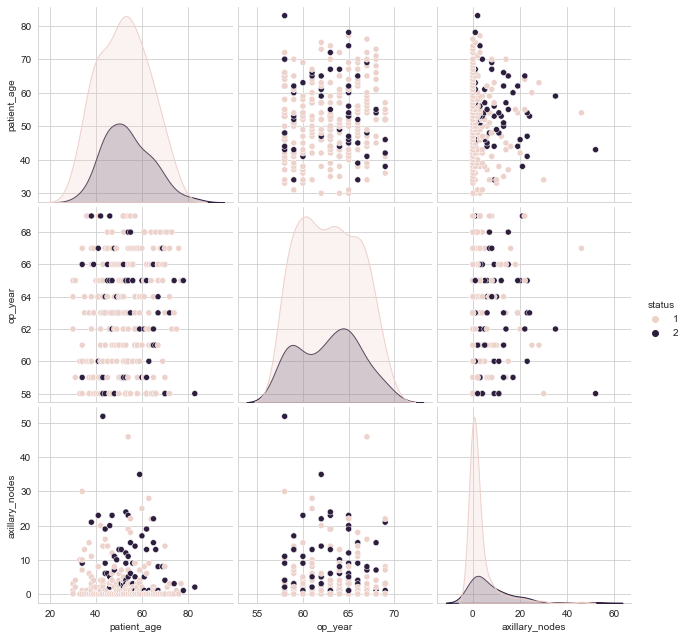

In [77]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status",size=3)
plt.show();



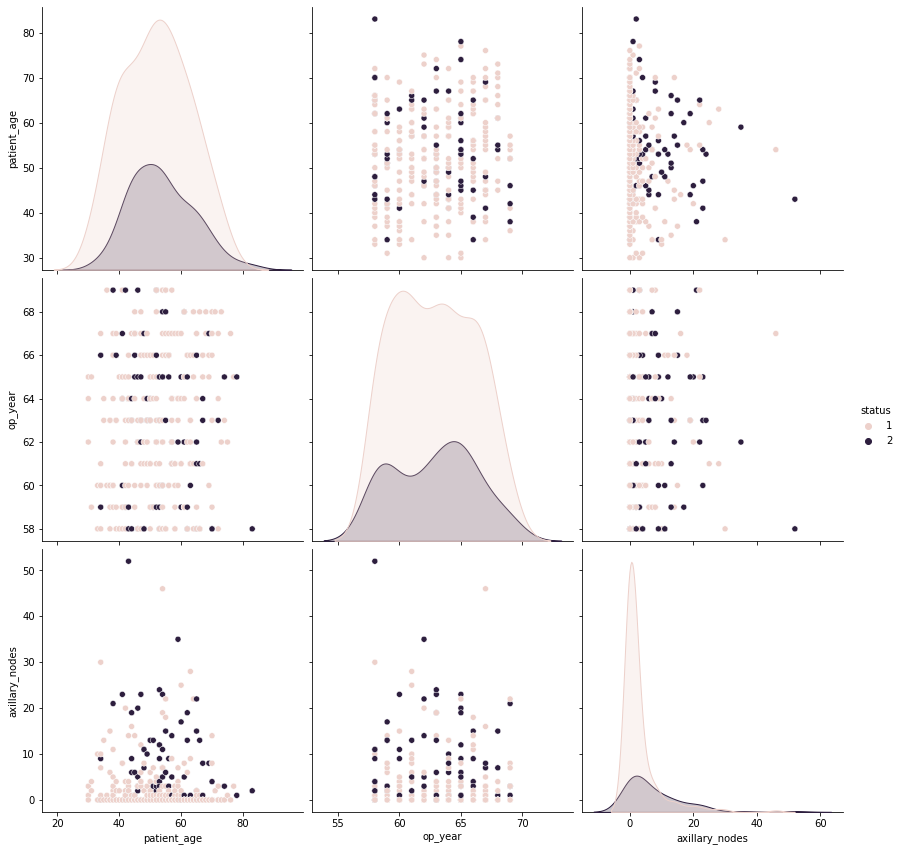

In [8]:
plt.close();
sns.pairplot(df,hue='status',height=4)
plt.show();

From the pair plot above, it can be observed that the data points pertaining to both survivers and non-survivers (irespective of combination of the plot) are mixed together. It is not possible to classify with regular observation and requires further analysis using univariable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


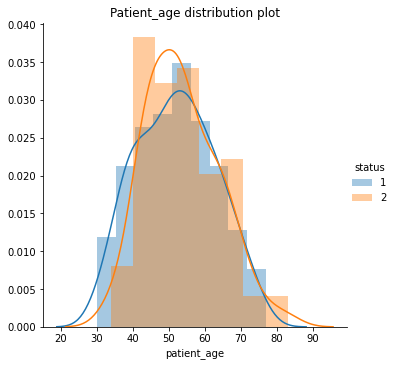

In [9]:
sns.FacetGrid(df,hue='status',size=5)\
.map(sns.distplot,'patient_age')\
.add_legend()
plt.title('Patient_age distribution plot');
plt.show();

In [10]:
# Significant overlap implies age is not a suitable variable for classification

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


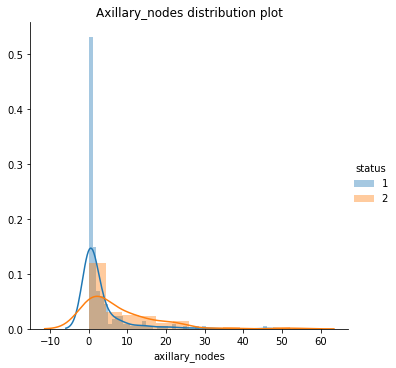

In [11]:
sns.FacetGrid(df,hue='status',size=5)\
.map(sns.distplot,'axillary_nodes')\
.add_legend();
plt.title('Axillary_nodes distribution plot')
plt.show();

The above histogram tells us that the probability of a patient with 0 axillary nodes surviving is high compare to patient having more than zero axillary nodes

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


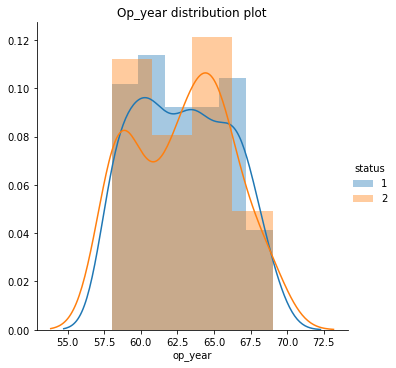

In [12]:
sns.FacetGrid(df,hue='status',size=5)\
.map(sns.distplot,'op_year')\
.add_legend();
plt.title('Op_year distribution plot');
plt.show();

The significant overlap tells us that year of surgery is unlikely to matter.

In [86]:
df_survivors = df.loc[df['status']== 1]

[0.56521739 0.15942029 0.07246377 0.06280193 0.04830918 0.00966184
 0.01932367 0.02415459 0.02415459 0.00966184 0.00966184 0.00483092
 0.         0.00483092 0.00483092 0.01449275 0.00483092 0.00483092
 0.         0.00483092 0.00483092 0.00483092 0.         0.00966184
 0.         0.         0.         0.00483092 0.         0.
 0.00483092 0.         0.00483092 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00483092]
[ 0.    0.92  1.84  2.76  3.68  4.6   5.52  6.44  7.36  8.28  9.2  10.12
 11.04 11.96 12.88 13.8  14.72 15.64 16.56 17.48 18.4  19.32 20.24 21.16
 22.08 23.   23.92 24.84 25.76 26.68 27.6  28.52 29.44 30.36 31.28 32.2
 33.12 34.04 34.96 35.88 36.8  37.72 38.64 39.56 40.48 41.4  42.32 43.24
 44.16 45.08 46.  ]
[0.52       0.14666667 0.06666667 0.05777778 0.04444444 0.00888889
 0.01777778 0.02222222 0.02222222 0.00888889 0.00888889 0.00444444
 0.         0.00444444 0.00

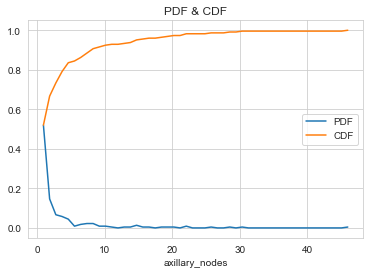

In [90]:
count, bin_edge = np.histogram(df_survivors['axillary_nodes'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)
print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('axillary_nodes')
plt.title('PDF & CDF')
plt.gca().legend(('PDF','CDF'));

The PDF and CDF also reiterate the fact that the patient has a high chance of surviving if they have less than 1 axillary node and the chances of are inversely proportional to the number of axillary nodes.

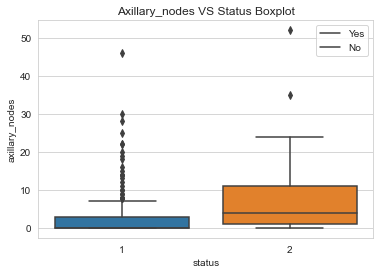

In [91]:
sns.boxplot(x='status',y='axillary_nodes',data=df)
plt.title('Axillary_nodes VS Status Boxplot')
plt.gca().legend(('Yes','No'))
plt.show();

From the boxplot above it is clear that as the axillary nodes increase post 5 (i.e mean of the no boxplot) the rate of deaths incrase drastically.

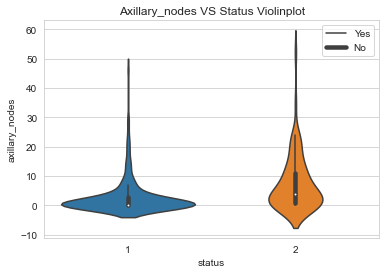

In [92]:
sns.violinplot(x='status', y='axillary_nodes', data = df)
plt.title('Axillary_nodes VS Status Violinplot')
plt.gca().legend(('Yes','No'))
plt.show()

The violin plot simply re-iterates the point made above by the boxplot, pdf & cdf. The patient has a high rate of survival if the number of axillary node is equal to 0

Conclusions:

Out of all the independent variables, the number of axillary nodes has the most impact in determining the status of a patience post-operation.

The patient has a high chance of surviving if they have less than 1 axillary node and the chances of survival are inversely proportional to the number of axillary nodes.

The patients who had nodes with more than 1 node are the majority of patients who died.